Рубежный контроль №1
Студент: Ян Тяньци
Группа: ИУ5И-21М
Вариант: 20
Задачи: 20, 40
1. Задача №20

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.model_selection import train_test_split
color=sns.color_palette()
sns.set_style('darkgrid')
pd.set_option('display.float_format',lambda x: '{:.3f}'.format(x))
%matplotlib inline

In [2]:
data = pd.read_csv('china_population_forecast.csv')
df=data.dropna()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          7 non-null      int64  
 1   Population                    7 non-null      int64  
 2   Yearly % Change               7 non-null      float64
 3   Yearly Change                 7 non-null      int64  
 4   Migrants (net)                7 non-null      int64  
 5   Median Age                    7 non-null      float64
 6   Fertility Rate                7 non-null      float64
 7   Density (P/Km²)               7 non-null      int64  
 8   Urban Pop %                   7 non-null      float64
 9   Urban Population              7 non-null      int64  
 10  Country's Share of World Pop  7 non-null      float64
 11  World Population              7 non-null      int64  
 12  China Global Rank             7 non-null      int64  
dtypes: float6

,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,China Global Rank
0,2020,1439323776,0.460,6495181,-348399,38.400,1.690,153,60.800,875075919,18.470,7794798739,1
1,2025,1457908249,0.260,3716895,-371264,40.200,1.690,155,65.600,956553854,17.810,8184437460,1
2,2030,1464340159,0.090,1286382,-352100,42.600,1.690,156,69.500,1017847445,17.130,8548487400,2
3,2035,1461083029,-0.040,-651426,-311798,45.000,1.690,156,72.500,1059618626,16.440,8887524213,2
4,2040,1449031423,-0.170,-2410321,-311801,46.300,1.690,154,74.800,1083464035,15.750,9198847240,2


In [3]:
data.head()

,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,China Global Rank
0,2020,1439323776,0.460,6495181,-348399,38.400,1.690,153,60.800,875075919,18.470,7794798739,1
1,2025,1457908249,0.260,3716895,-371264,40.200,1.690,155,65.600,956553854,17.810,8184437460,1
2,2030,1464340159,0.090,1286382,-352100,42.600,1.690,156,69.500,1017847445,17.130,8548487400,2
3,2035,1461083029,-0.040,-651426,-311798,45.000,1.690,156,72.500,1059618626,16.440,8887524213,2
4,2040,1449031423,-0.170,-2410321,-311801,46.300,1.690,154,74.800,1083464035,15.750,9198847240,2


In [4]:
data.isnull().sum()

Year                            0
Population                      0
Yearly % Change                 0
Yearly Change                   0
Migrants (net)                  0
Median Age                      0
Fertility Rate                  0
Density (P/Km²)                 0
Urban Pop %                     0
Urban Population                0
Country's Share of World Pop    0
World Population                0
China Global Rank               0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          7 non-null      int64  
 1   Population                    7 non-null      int64  
 2   Yearly % Change               7 non-null      float64
 3   Yearly Change                 7 non-null      int64  
 4   Migrants (net)                7 non-null      int64  
 5   Median Age                    7 non-null      float64
 6   Fertility Rate                7 non-null      float64
 7   Density (P/Km²)               7 non-null      int64  
 8   Urban Pop %                   7 non-null      float64
 9   Urban Population              7 non-null      int64  
 10  Country's Share of World Pop  7 non-null      float64
 11  World Population              7 non-null      int64  
 12  China Global Rank             7 non-null      int64  
dtypes: float6

In [6]:
max_change=data["Yearly Change"].max()
print(max_change)
min_change=data["Yearly Change"].min()
for i in range(data.shape[0]):
       data.iloc[i,3]=(data.iloc[i,3]-min_change)/(max_change-min_change)
data.head()

6495181


,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,China Global Rank
0,2020,1439323776,0.460,1.000,-348399,38.400,1.690,153,60.800,875075919,18.470,7794798739,1
1,2025,1457908249,0.260,0.766,-371264,40.200,1.690,155,65.600,956553854,17.810,8184437460,1
2,2030,1464340159,0.090,0.561,-352100,42.600,1.690,156,69.500,1017847445,17.130,8548487400,2
3,2035,1461083029,-0.040,0.398,-311798,45.000,1.690,156,72.500,1059618626,16.440,8887524213,2
4,2040,1449031423,-0.170,0.250,-311801,46.300,1.690,154,74.800,1083464035,15.750,9198847240,2


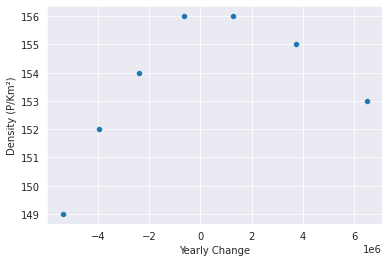

In [7]:
sns.scatterplot(x='Yearly Change',y='Density (P/Km²)',data=df)

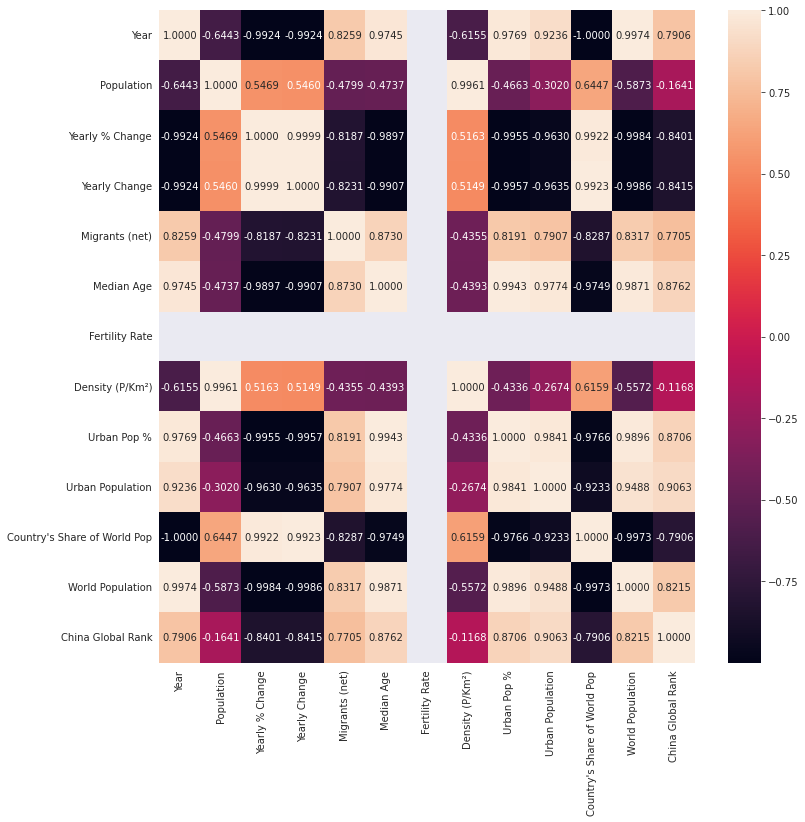

In [8]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, fmt='.4f')

In [9]:
import scipy.stats as stats

In [10]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot = plt)
    plt.show()

Оптимальное значение λ = 5.409548318400026


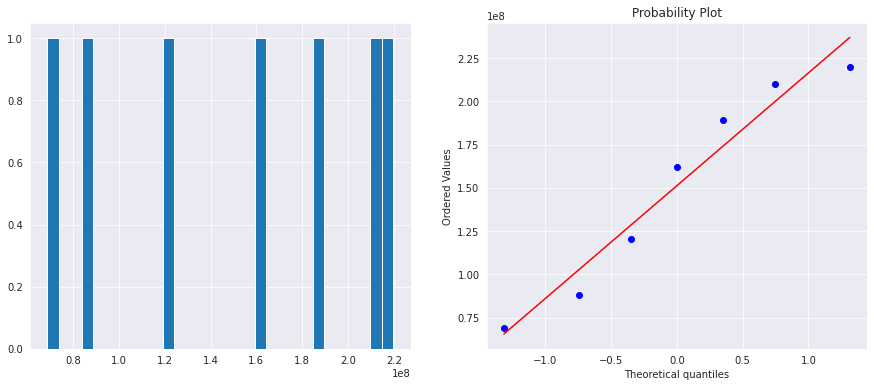

In [11]:
data['Median Age_boxcox'], param = stats.boxcox(data['Median Age']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'Median Age_boxcox')

2. Задача №40.

In [12]:
def make_corr_df(df):
    cr = data.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.8]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [13]:
make_corr_df(data)

,f1,f2,corr
0,Country's Share of World Pop,Year,1.000
1,Year,Country's Share of World Pop,1.000
2,Yearly % Change,Yearly Change,1.000
3,Yearly Change,Yearly % Change,1.000
4,Yearly Change,World Population,0.999
...,...,...,...
99,World Population,China Global Rank,0.822
100,Migrants (net),Urban Pop %,0.819
101,Urban Pop %,Migrants (net),0.819
102,Migrants (net),Yearly % Change,0.819


In [14]:
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [15]:
corr_groups(make_corr_df(data))

[['Year',
  'World Population',
  'Yearly Change',
  'Yearly % Change',
  'Median Age_boxcox',
  'Urban Pop %',
  'Median Age',
  'Urban Population',
  'Migrants (net)',
  "Country's Share of World Pop"],
 ['Density (P/Km²)', 'Population'],
 ['Urban Population',
  'Median Age',
  'Urban Pop %',
  'Yearly Change',
  'Yearly % Change',
  'Median Age_boxcox',
  'World Population',
  'China Global Rank']]

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.model_selection import train_test_split
color=sns.color_palette()
sns.set_style('darkgrid')
pd.set_option('display.float_format',lambda x: '{:.3f}'.format(x))
%matplotlib inline

In [27]:
data_2=pd.read_csv('water_potability.csv')
data_2.info()
data_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               40 non-null     float64
 1   Hardness         40 non-null     float64
 2   Solids           40 non-null     float64
 3   Chloramines      40 non-null     float64
 4   Sulfate          40 non-null     float64
 5   Conductivity     40 non-null     float64
 6   Organic_carbon   40 non-null     float64
 7   Trihalomethanes  40 non-null     float64
 8   Turbidity        40 non-null     float64
 9   Potability       40 non-null     int64  
dtypes: float64(9), int64(1)
memory usage: 3.2 KB


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,3.380,204.890,20791.319,7.300,368.516,564.309,10.380,86.991,2.963,0
1,3.716,129.423,18630.058,6.635,3.142,592.885,15.180,56.329,4.501,0
2,8.099,224.236,19909.542,9.276,2.013,418.606,16.869,66.420,3.056,0
3,8.317,214.373,22018.417,8.059,356.886,363.267,18.437,100.342,4.629,0
4,9.092,181.102,17978.986,6.547,310.136,398.411,11.558,31.998,4.075,0


In [28]:
a=data_2.drop(labels=['Turbidity'],axis=1)
b=data_2.Turbidity

In [29]:
a.shape

(40, 9)

Импорт библиотек

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

Text(0, 0.5, 'Взаимная информация')

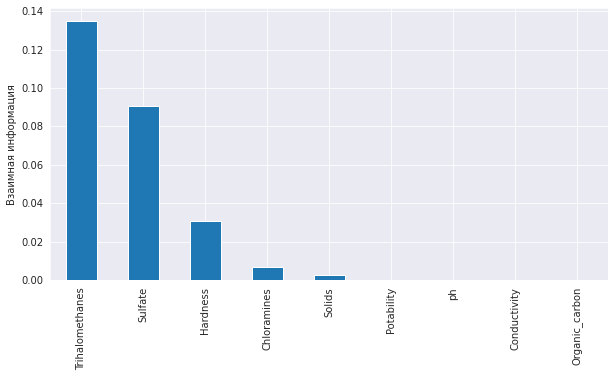

In [31]:
mi = mutual_info_regression(a,b)
mi = pd.Series(mi)
mi.index = a.columns
mi.sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.ylabel('Взаимная информация')

In [32]:
selector=SelectKBest(mutual_info_regression,k=5)
selector.fit(a,b)
X_selected=selector.transform(a)
X_selected.shape

(40, 5)

In [33]:
selector.get_support(indices=False)

array([False,  True,  True,  True,  True, False, False,  True, False])

In [34]:
a.columns[selector.get_support()]

Index(['Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Trihalomethanes'], dtype='object')

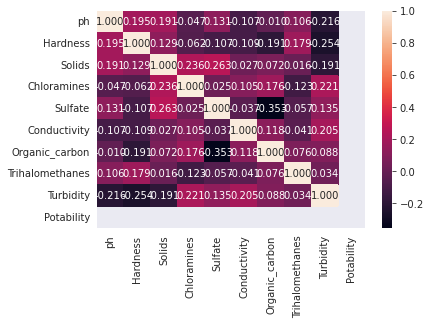

In [35]:
sns.heatmap(data_2.corr(),annot=True, fmt='.3f')